## Predicción de productividad de los empleados
---
La industria de la confección es uno de los ejemplos clave de la globalización industrial de esta era moderna. Es una industria que requiere mucha mano de obra y muchos procesos manuales. Satisfacer la enorme demanda mundial de productos de confección depende principalmente del rendimiento de producción y entrega de los empleados en las empresas de fabricación de prendas de vestir. Por lo tanto, es muy deseable entre los tomadores de decisiones en la industria de la confección rastrear, analizar y predecir el desempeño productivo de los equipos de trabajo en sus fábricas.


#### Fuente del conjunto de datos: 
El dataset fue extraído de: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)


---

### Explicación de las variables ###
---
    
    
* **date:** fecha en MM-DD-AAAA
* **day:** día de la semana
* **quarter:** una parte del mes. Un mes se dividió en cuatro trimestres
* **department:** departamento asociado con la instancia
* **team_no:** número de equipo asociado con la instancia
* **no_of_workers:** número de trabajadores en cada equipo
* **no_of_style_change:** número de cambios en el estilo de un producto en particular
* **targeted_productivity:** productividad esperada fijada por la Autoridad para cada equipo para cada día
* **smv:** valor estándar de minutos, es el tiempo asignado para una tarea
* **wip:** trabajo en curso. Incluye la cantidad de elementos sin terminar para los productos
* **over_time:** representa la cantidad de tiempo extra de cada equipo en minutos
* **incentive:** representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción particular
* **idle_time:** la cantidad de tiempo en que la producción se interrumpió debido a varias razones
* **idle_men:** el número de trabajadores que estuvieron inactivos debido a la interrupción de la producción
* **actual_productivity:** el % real de productividad que entregaron los trabajadores. Va de 0-1.

## Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

## Importamos el dataset

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Distribución de las variables y tipo de variable

In [3]:
df.shape

(1197, 15)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [5]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [7]:
# Pasamos 'date' a tipo fecha
df['date'] = pd.to_datetime(df['date'])

### Analizamos la variable 'department'

In [8]:
# Aquí podemos ver algo extraño
df.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [9]:
# Vemos que hay un espacio de más
df.department.values

array(['sweing', 'finishing ', 'sweing', ..., 'finishing', 'finishing',
       'finishing'], dtype=object)

In [10]:
df['department'] = df['department'].str.replace(' ','')
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [11]:
# Volvemos a observar la cantidad de valores de 'department'
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

<AxesSubplot:xlabel='department', ylabel='count'>

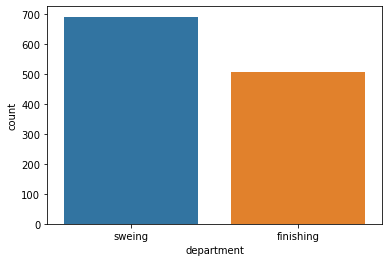

In [12]:
sns.countplot(x = df["department"])

Como conclusión, hay mayor cantidad en 'sweing'

### Analizamos la variable 'team'

<AxesSubplot:xlabel='team', ylabel='count'>

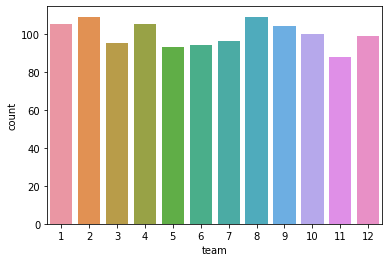

In [13]:
sns.countplot(x = df['team'])

In [14]:
df.team.value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

En los equipos hay una distribución muy pareja

### Comparemos las gráficas entre la productividad esperada y la productividad actual

C:\Users\david\anacondaGrafico\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\david\anacondaGrafico\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


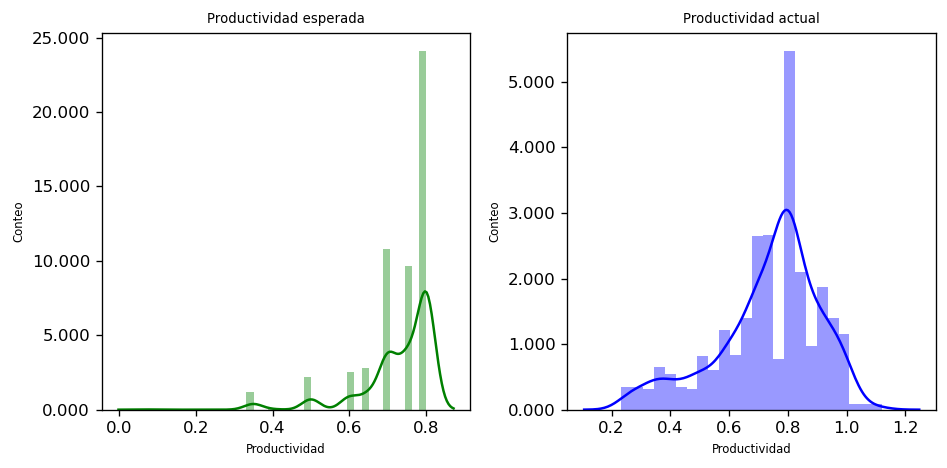

In [15]:
from matplotlib.ticker import FormatStrFormatter

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(x = df['targeted_productivity'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Productividad esperada',fontdict={'fontsize':8})
axes[0].set_xlabel('Productividad',fontdict={'fontsize':7})
axes[0].set_ylabel('Conteo',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.distplot(x= df['actual_productivity'],color='blue')
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[1].set_title('Productividad actual',fontdict={'fontsize':8})
axes[1].set_xlabel('Productividad',fontdict={'fontsize':7})
axes[1].set_ylabel('Conteo',fontdict={'fontsize':7})
plt.tight_layout()

Me parece curioso que en la productividad actual hayan valores mayores que 1

In [16]:
a = df[df['actual_productivity'] > 1]
a.shape

(37, 15)

<AxesSubplot:ylabel='targeted_productivity'>

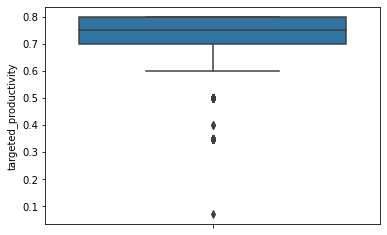

In [17]:
from seaborn import boxplot
boxplot(y =df.targeted_productivity, orient="v")

<AxesSubplot:ylabel='actual_productivity'>

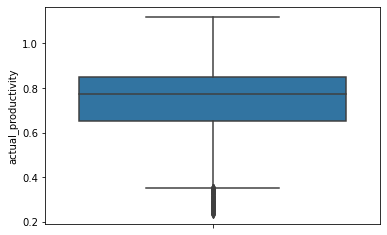

In [18]:
boxplot(y =df.actual_productivity, orient="v")

Aqui vemos que la mayoria de los datos son similares entre la productividad esperada y la actual

También vemos que la mayoria tiene buena productividad y hay pocos casos donde son valores outliers bajos

### Analizamos la variable 'incentive'

<AxesSubplot:ylabel='incentive'>

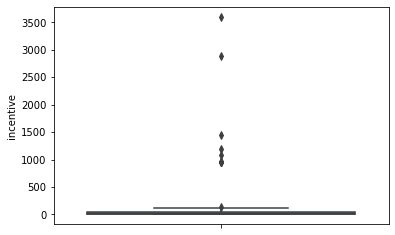

In [20]:
boxplot(y =df.incentive, orient="v")

<AxesSubplot:ylabel='Frequency'>

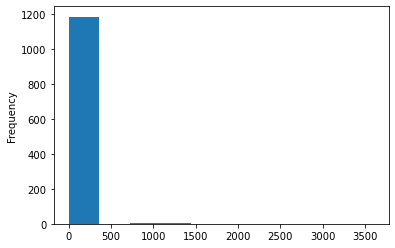

In [21]:
df['incentive'].plot.hist()

Vemos a simple vista que casi todos los datos tienen valores pequeños y hay pocos outliers muy altos

# Análisis Bivariado 

### Targeted productivity vs Actual productivity
Podríamos poner esta comparación en el análisis bivariado

In [22]:
targVSact = ['targeted_productivity', 'actual_productivity']
df[targVSact].describe()

,targeted_productivity,actual_productivity
count,1197.000000,1197.000000
mean,0.729632,0.735091
std,0.097891,0.174488
min,0.070000,0.233705
25%,0.700000,0.650307
50%,0.750000,0.773333
75%,0.800000,0.850253
max,0.800000,1.120437


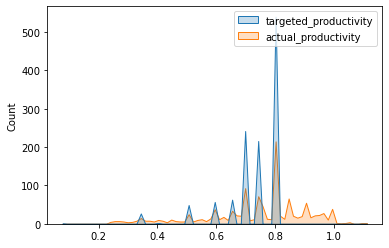

In [23]:
sns.histplot(data=df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

## 'smv VS 'no_of_workers' 
Para comparar el tiempo asignado en cada tarea a los trabajadores, dependiendo del departamento (sweing o finishing)

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

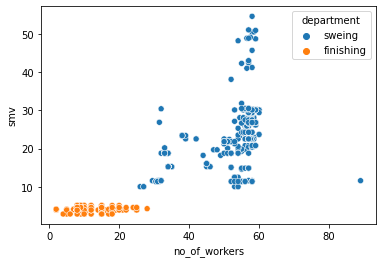

In [24]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

Vemos que al departamento de finishing (acabado) normalmente se le asigna la misma cantidad de tiempo para sus tareas, mientras que al deprtamento de sweing (costura) se le asigna timpos bastante diferentes o dispersos para sus tareas.

## 'over_time'

<AxesSubplot:xlabel='department', ylabel='over_time'>

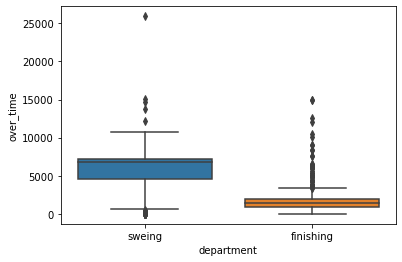

In [25]:
sns.boxplot(x='department', y='over_time', data=df)

Tiempo extra que tardan por departamento

<AxesSubplot:xlabel='team', ylabel='over_time'>

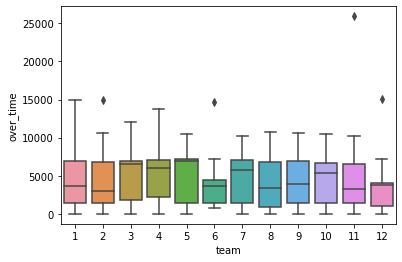

In [26]:
sns.boxplot(x='team',y='over_time',data=df)

Tiempo extra que tardan por equipo

In [36]:
overTime_dep_team = df.groupby(['department', 'team']).median()['over_time']
overTime_dep_team.to_frame()

over_time
department team           
finishing  1        1440.0
           2        1440.0
           3        1800.0
           4        1920.0
           5        1440.0
           6         960.0
           7        1440.0
           8        1440.0
           9        1140.0
           10       1440.0
           11       1440.0
           12       1080.0
sweing     1        6960.0
           2        6840.0
           3        6840.0
           4        7020.0
           5        7080.0
           6        3960.0
           7        6960.0
           8        6840.0
           9        6930.0
           10       6720.0
           11       3660.0
           12       4080.0

Usamos la mediana para evitar alteraciones por los valores extremos

## 'No_of_workers'

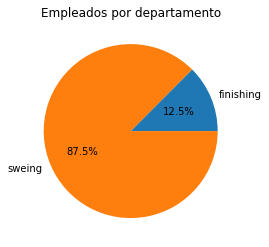

In [46]:
data = df.groupby(['department']).no_of_workers.sum()

data.plot.pie(title="Empleados por departamento", autopct='%1.1f%%')

plt.ylabel(None)
plt.show()

## Matriz de correlación entre las variables

<AxesSubplot:>

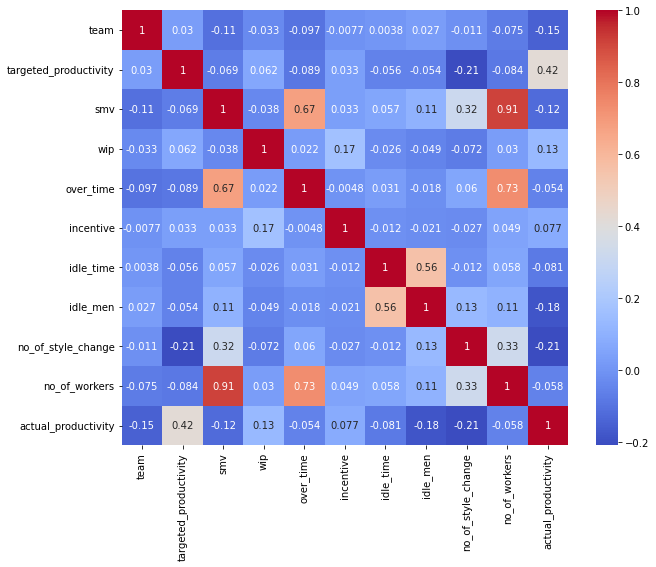

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

**Correlaciones positivas altas:**
* 'no_of_workers' vs 'smv' (0.91)
* 'no_of_workers' vs 'over_time' (0.73)
* 'over_time' vs 'smv' (0.67)
* 'idle_men' vs 'idle_time' (0.56)